# OASIS INFOBYTE INTERNSHIP - TASK_01

# ABOUT DATASET

The Iris Flower dataset is a classic dataset in the field of machine learning and statistics. It is often used for learning and demonstration purposes due to its straightforward nature and clear classification task. Here's an explanation of the Iris Flower dataset:

### Dataset Overview:
- **Source**: The dataset was introduced by British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis.
- **Purpose**: It is used for the task of classification, where the goal is to predict the species of an iris flower based on various measurements.
- **Content**: The dataset consists of 150 samples of iris flowers. Each sample includes four features describing the morphology of each flower, and a label specifying the species of the flower.

### Features (Attributes):
1. **Sepal Length**: Length of the sepal (in centimeters).
2. **Sepal Width**: Width of the sepal (in centimeters).
3. **Petal Length**: Length of the petal (in centimeters).
4. **Petal Width**: Width of the petal (in centimeters).

### Target (Label):
- **Species**: The species of iris flower. There are three possible classes:
  - Setosa
  - Versicolor
  - Virginica

### Data Distribution:
- There are 50 samples from each of the three species of iris flowers (Setosa, Versicolor, Virginica), making a total of 150 samples.
- The dataset is balanced, meaning each class has an equal number of samples.

### Purpose of the Dataset:
- The main purpose of the Iris dataset is to demonstrate classification techniques in machine learning. Given the four features (sepal length, sepal width, petal length, and petal width), the task is to build a model that can accurately predict the species of iris flowers based on these measurements.
- It is commonly used to illustrate concepts such as data exploration, preprocessing, model selection, and evaluation in machine learning workflows.

### Applications:
- **Education and Training**: It is widely used in educational contexts for teaching purposes, as it allows students and beginners to practice data analysis and classification techniques.
- **Benchmarking Algorithms**: Because of its simplicity and well-defined nature, the Iris dataset is often used as a benchmark to compare the performance of different machine learning algorithms.
- **Feature Selection**: Researchers sometimes use this dataset to demonstrate techniques for feature selection and dimensionality reduction.

### Availability:
- The Iris dataset is easily accessible through various machine learning libraries like scikit-learn in Python, making it convenient for researchers and practitioners to experiment with.

### Conclusion:
The Iris Flower dataset serves as an excellent starting point for learning classification algorithms in machine learning. Its simplicity, clear classification task, and availability make it a popular choice for beginners and experts alike to explore and demonstrate various aspects of data analysis and machine learning techniques.

# LIBRARIES

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# DATASET

In [82]:
iris = load_iris()

In [83]:
x = pd.DataFrame(data=iris.data, columns=iris.feature_names)

y = pd.DataFrame(data=iris.target, columns=['species'])

In [84]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


# DATA CLEANING

In [86]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [87]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   species  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [89]:
y['species'].unique()

array([0, 1, 2])

0: Setosa
1: Versicolor
2: Virginica

# DATA PRE-PROCESSING

## EDA

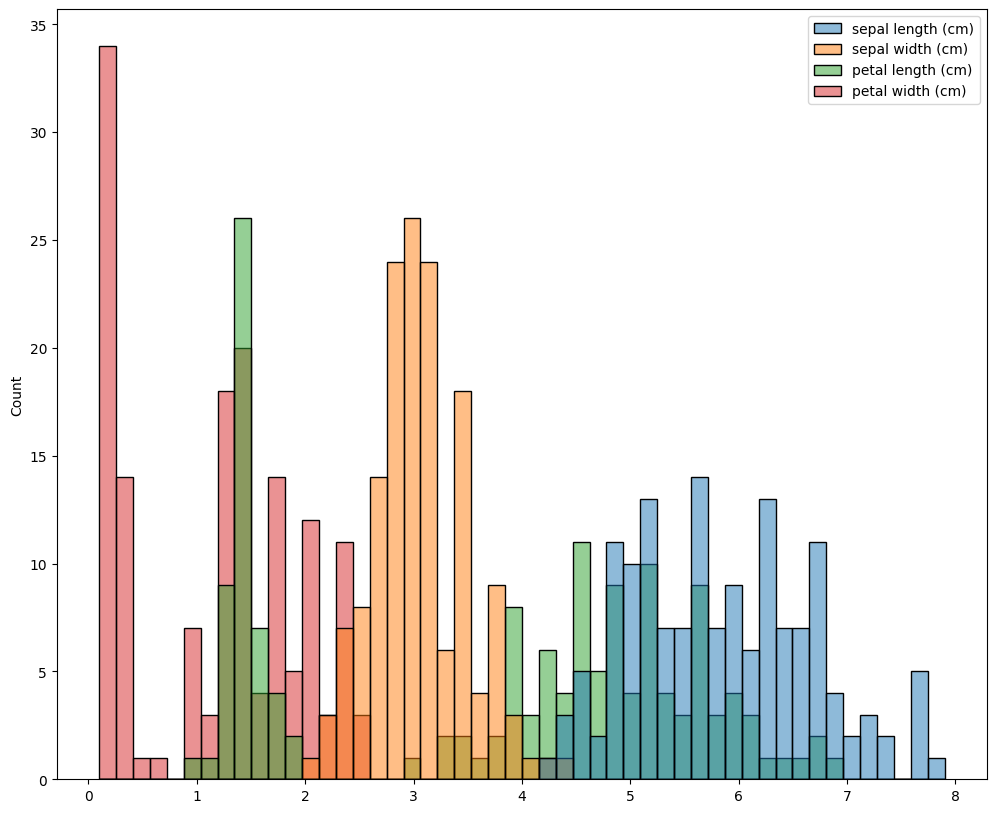

In [90]:
plt.figure(figsize = (12,10))
sns.histplot(x, bins = 50)
plt.show()

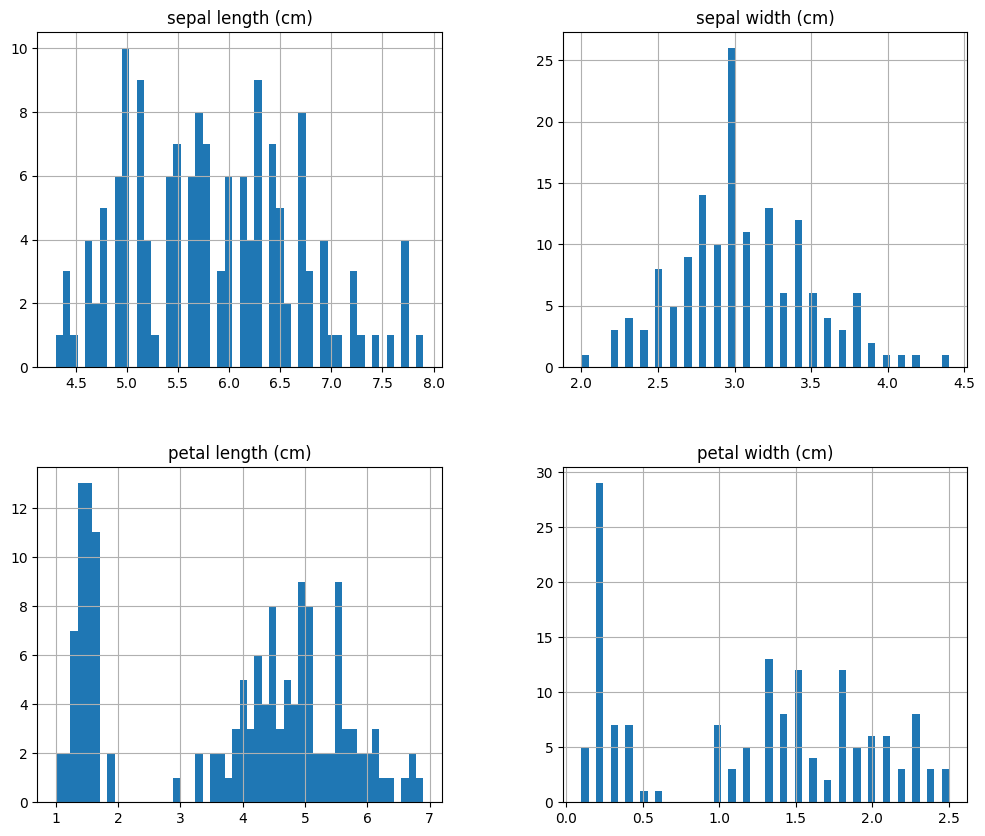

In [91]:
x.hist(figsize = (12,10), bins = 50)
plt.show()

## TRANSFORMATION

In [92]:
power = PowerTransformer(method='yeo-johnson')

In [93]:
X_transformed = power.fit_transform(x)

In [94]:
X_transformed_df = pd.DataFrame(X_transformed, columns=x.columns)

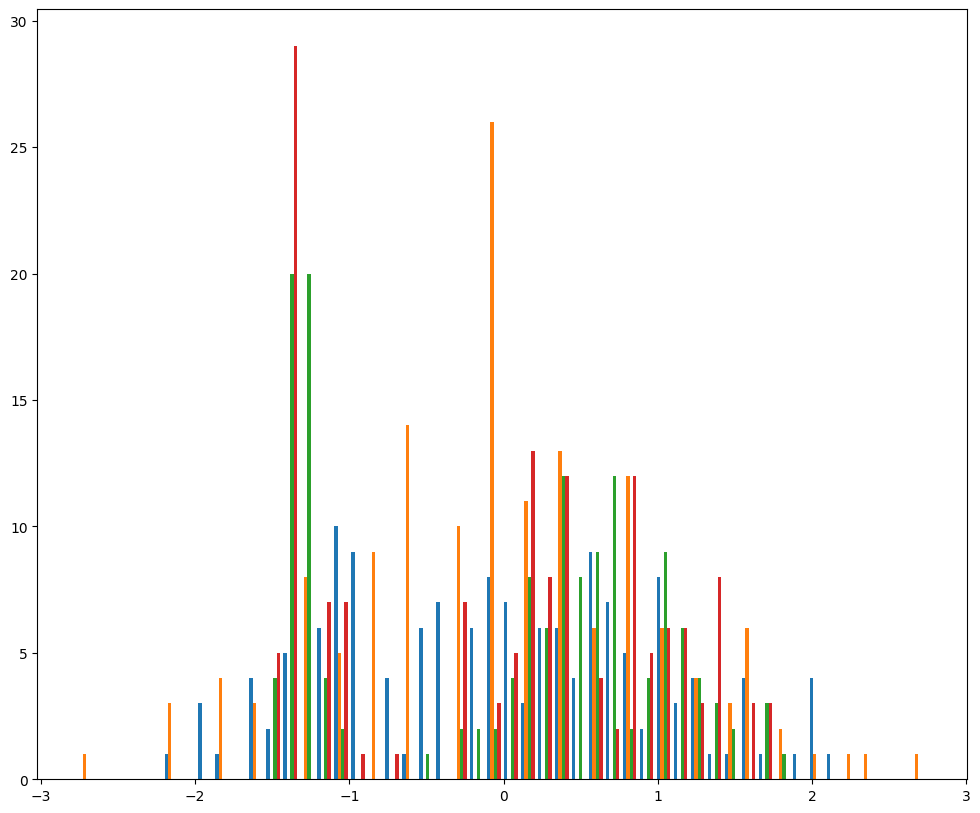

In [95]:
plt.figure(figsize=(12, 10))
plt.hist(X_transformed, bins=50)
plt.show()

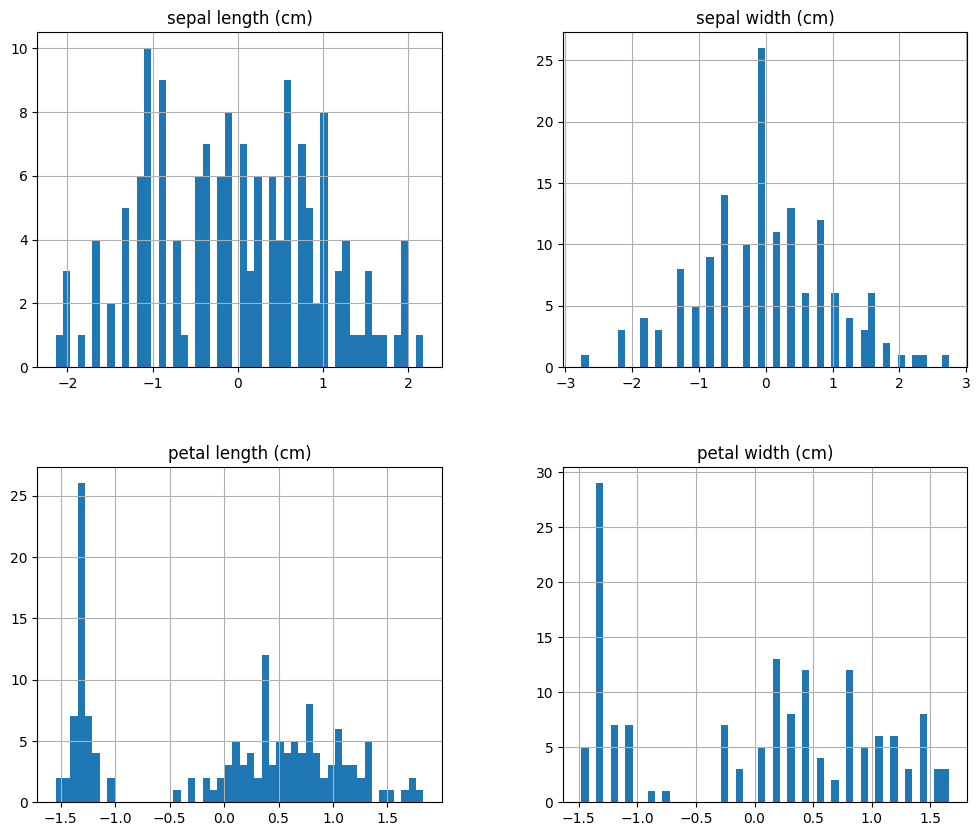

In [96]:
X_transformed_df.hist(figsize = (12,10), bins = 50)
plt.show()

# MODEL TRAINING

In [97]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()

In [98]:
xtrain, xtest, ytrain, ytest = train_test_split(X_transformed_df, y, test_size = 0.3, random_state = 42, shuffle= True)

## LOGISTIC REGRESSION

In [99]:
log_reg.fit(xtrain,ytrain)

LogisticRegression()

## K- NEAREST NEIGHBOUR

In [100]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

# RANDOM CLASSIFIER

In [101]:
random_forest.fit(xtrain,ytrain)

RandomForestClassifier()

# EVALUATION

In [102]:
pred_log_reg = log_reg.predict(xtest)
pred_knn = knn.predict(xtest)
pred_random_forest = random_forest.predict(xtest)

In [103]:
print("Logistic Regression Predictions:")
print(classification_report(ytest,pred_log_reg))
print("K-Nearest Neighbors Predictions:")
print(classification_report(ytest,pred_knn))
print("Random Forest Predictions:")
print(classification_report(ytest,pred_random_forest))

Logistic Regression Predictions:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

K-Nearest Neighbors Predictions:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Random Forest Predictions:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00   

## CROSS-VALIDATION

In [104]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()

scores_log_reg = cross_val_score(log_reg, X_transformed_df, y, cv=5)
scores_knn = cross_val_score(knn, X_transformed_df, y, cv=5)
scores_random_forest = cross_val_score(random_forest, X_transformed_df, y, cv=5)

print("Logistic Regression CV Scores:", scores_log_reg)
print("K-Nearest Neighbors CV Scores:", scores_knn)
print("Random Forest CV Scores:", scores_random_forest)

print('\n\n')
print("Logistic Regression Mean CV Score:", scores_log_reg.mean())
print("K-Nearest Neighbors Mean CV Score:", scores_knn.mean())
print("Random Forest Mean CV Score:", scores_random_forest.mean())


Logistic Regression CV Scores: [0.96666667 1.         0.93333333 0.93333333 1.        ]
K-Nearest Neighbors CV Scores: [0.96666667 0.96666667 0.93333333 0.9        1.        ]
Random Forest CV Scores: [0.96666667 0.96666667 0.93333333 0.9        1.        ]



Logistic Regression Mean CV Score: 0.9666666666666668
K-Nearest Neighbors Mean CV Score: 0.9533333333333334
Random Forest Mean CV Score: 0.9533333333333334
